# Importando as bibliotecas utilizadas no projeto

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a tabela aluguel.csv e convetendo para o DataFrame

In [10]:
aluguel_df = pd.read_csv('aluguel.csv',sep=';')
aluguel_df = aluguel_df.fillna(0)
aluguel_df.index +=1
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
4,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
5,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32956,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32957,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32958,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32959,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


# Pegando informação dos maiores e menores alugueis

In [11]:
maiores_alugueis = aluguel_df.groupby('Bairro').max()['Valor']
maiores_alugueis = maiores_alugueis.to_frame()
maiores_alugueis = maiores_alugueis.sort_values('Valor', ascending=False)
maiores_alugueis

,Valor
Bairro,
Jacarepaguá,120000000.0
Irajá,15000000.0
Botafogo,4500000.0
Humaitá,1324640.0
Caju,1279200.0
...,...
Turiaçu,900.0
Magalhães Bastos,900.0
Santíssimo,900.0


# Pegando a mediana do valor do aluguel por bairro

In [12]:
median_bairros = aluguel_df[['Bairro', 'Valor']].groupby('Bairro').median()
median_bairros = median_bairros.reset_index()
median_bairros.index +=1
median_bairros


,Bairro,Valor
1,Abolição,1200.0
2,Alto da Boa Vista,1850.0
3,Anchieta,775.0
4,Andaraí,1400.0
5,Anil,1600.0
...,...,...
158,Vila Valqueire,1300.0
159,Vila da Penha,1100.0
160,Vista Alegre,1150.0
161,Zumbi,2850.0


# Pegando a quantidade de imoveis por bairro

In [13]:
quantidade_bairro = aluguel_df['Bairro'].value_counts()
quantidade_bairro = quantidade_bairro.to_frame()
quantidade_bairro = quantidade_bairro.rename(columns={'Bairro': 'Quantidade'})
quantidade_bairro = quantidade_bairro.reset_index()
quantidade_bairro = quantidade_bairro.rename(columns={'index':'Bairro'})

In [14]:
quantidade_bairro

,Bairro,Quantidade
0,Barra da Tijuca,6259
1,Centro,3258
2,Copacabana,3186
3,Ipanema,2233
4,Recreio dos Bandeirantes,2127
...,...,...
157,Cachamorra,1
158,Vasco da Gama,1
159,Cidade de Deus,1
160,Itaguaí,1


# Fazendo um merge da tabela de quantidade_bairro e median_bairros e extraindo as informaçoes com as maiores medianas do valor por bairro

In [15]:
median_bairros = median_bairros.merge(quantidade_bairro[['Quantidade','Bairro']],on='Bairro')
median_bairros = median_bairros.loc[median_bairros['Quantidade'] > 100]
median_bairros = median_bairros.rename(columns={'Valor':'Valor da Mediana'})
median_bairros = median_bairros.sort_values('Valor da Mediana', ascending=False)
median_bairros.index = range(median_bairros.shape[0])
median_bairros.index += 1
median_bairros

,Bairro,Valor da Mediana,Quantidade
1,Leblon,7000.0,1478
2,Ipanema,7000.0,2233
3,São Conrado,5800.0,289
4,Lagoa,5500.0,530
5,Gávea,4550.0,244
6,Jardim Botânico,4000.0,350
7,Botafogo,4000.0,1377
8,Centro,3705.5,3258
9,Barra da Tijuca,3500.0,6259
10,Humaitá,3200.0,187


# Grafico com o valor da mediana por bairro

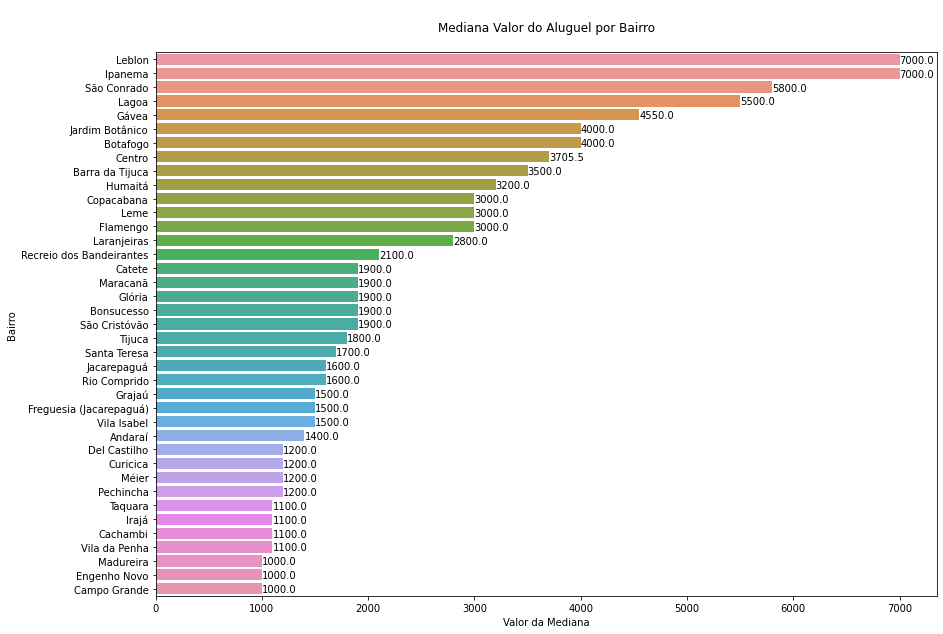

In [16]:
plt.figure(figsize=(14,10))
sns.barplot(y=median_bairros.Bairro, x=median_bairros['Valor da Mediana'],orient='h')


for i in range(len(median_bairros.index)):
    plt.text(median_bairros['Valor da Mediana'][median_bairros.index[i]],
             i + 0.25,
             round(median_bairros['Valor da Mediana'][median_bairros.index[i]],2))
 
plt.title('\nMediana Valor do Aluguel por Bairro\n')
plt.show()

# Criando a tabela de calculo do valor do metro quadrado por imovel

In [17]:
aluguel_df['Valor m2'] = (aluguel_df['Valor'] / aluguel_df['Area']).round(2)
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00
3,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67
4,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33
5,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67
...,...,...,...,...,...,...,...,...,...,...
32956,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63
32957,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08
32958,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17
32959,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86


# Calculando a mediana do valor do metro quadrado por bairro

In [18]:
valor_m2 = aluguel_df.groupby('Bairro')
valor_m2 = valor_m2['Valor m2'].median().round(2)
valor_m2 = valor_m2.to_frame()
valor_m2 = valor_m2.rename(columns={'Valor m2':'Valor Mediana m2'})
valor_m2 = valor_m2.reset_index()
valor_m2 = valor_m2.sort_values('Valor Mediana m2', ascending=False)

valor_m2

,Bairro,Valor Mediana m2
67,Itaguaí,122.95
28,Cidade Jardim,61.22
29,Cidade Nova,60.00
5,Arpoador,59.10
65,Ipanema,56.25
...,...,...
71,Jacaré,10.84
72,Jardim América,10.71
30,Cidade de Deus,10.37
153,Vigário Geral,10.31


# Fazendo um merge da tabela valor_m2 e quantidade_bairro

In [19]:
valor_m2 = valor_m2.merge(quantidade_bairro[['Quantidade', 'Bairro']], on = 'Bairro')
valor_m2 

,Bairro,Valor Mediana m2,Quantidade
0,Itaguaí,122.95,1
1,Cidade Jardim,61.22,1
2,Cidade Nova,60.00,52
3,Arpoador,59.10,16
4,Ipanema,56.25,2233
...,...,...,...
157,Jacaré,10.84,6
158,Jardim América,10.71,17
159,Cidade de Deus,10.37,1
160,Vigário Geral,10.31,17


# Extraindo informaçoes apenas do bairro com mais de 100 imoveis e mostrando a mediana

In [20]:
valor_m2 = valor_m2.loc[valor_m2['Quantidade'] > 100]
valor_m2.index = range(valor_m2.shape[0])
valor_m2.index +=1
valor_m2

,Bairro,Valor Mediana m2,Quantidade
1,Ipanema,56.25,2233
2,Leblon,55.56,1478
3,Botafogo,46.88,1377
4,Jardim Botânico,43.75,350
5,Gávea,42.49,244
6,Lagoa,42.30,530
7,Leme,38.96,246
8,Humaitá,38.81,187
9,Catete,38.64,196
10,Copacabana,37.50,3186


# Criando a mediana no metro quadrado por bairro

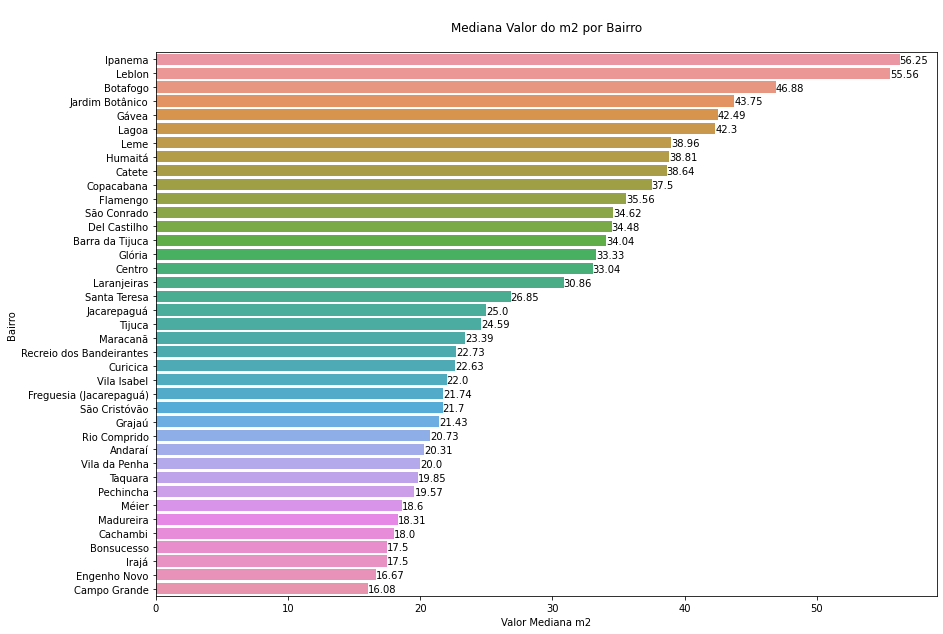

In [21]:
plt.figure(figsize=(14,10))
sns.barplot(y=valor_m2.Bairro, x=valor_m2['Valor Mediana m2'],orient='h')


for i in range(len(valor_m2.index)):
    plt.text(valor_m2['Valor Mediana m2'][valor_m2.index[i]],
             i + 0.25,
             round(valor_m2['Valor Mediana m2'][valor_m2.index[i]],2))
 
plt.title('\nMediana Valor do m2 por Bairro\n')
plt.show()

# Calculando a quantidade de imoveis por tipo

In [22]:
quantidade_tipo = aluguel_df['Tipo'].value_counts()
quantidade_tipo = quantidade_tipo.to_frame()
quantidade_tipo = quantidade_tipo.rename(columns={'Tipo':'Quantidade'})
quantidade_tipo


,Quantidade
Apartamento,19532
Conjunto Comercial/Sala,6815
Loja/Salão,1426
Casa de Condomínio,996
Casa,967
Quitinete,836
Galpão/Depósito/Armazém,623
Flat,476
Prédio Inteiro,301
Casa Comercial,265


# Mostrando os tipos de imoveis para aluguel

In [23]:
separando_tipos = aluguel_df['Tipo'].drop_duplicates()
separando_tipos

1                          Quitinete
2                               Casa
3            Conjunto Comercial/Sala
4                        Apartamento
8                 Casa de Condomínio
17                    Prédio Inteiro
18                              Flat
30                        Loja/Salão
81           Galpão/Depósito/Armazém
84                    Casa Comercial
118                     Casa de Vila
160                   Terreno Padrão
208                      Box/Garagem
348                             Loft
590      Loja Shopping/ Ct Comercial
2158                         Chácara
3355           Loteamento/Condomínio
4380                           Sítio
4722                   Pousada/Chalé
6984                          Studio
9688                           Hotel
23615                      Indústria
Name: Tipo, dtype: object

# Criando a tabela "Tipo agregado" e separando os imoveis entre residencial e comercial

In [24]:
aluguel_df['Tipo Agregado'] = '-'
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,-
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,-
3,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,-
4,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,-
5,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,-
...,...,...,...,...,...,...,...,...,...,...,...
32956,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,-
32957,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,-
32958,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,-
32959,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,-


In [25]:
residencial = [separando_tipos[1],separando_tipos[2], separando_tipos[4],separando_tipos[8],separando_tipos[18],
              separando_tipos[118],separando_tipos[160], separando_tipos[348],separando_tipos[2158],separando_tipos[3355],
              separando_tipos[4380]]


comercial = [separando_tipos[3],separando_tipos[17],separando_tipos[30],separando_tipos[81],separando_tipos[84],
            separando_tipos[208], separando_tipos[590],separando_tipos[4722],separando_tipos[6984],
             separando_tipos[9688], separando_tipos[23615]]


print('Residencial: {}'.format(residencial))
print('')
print('Comercial: {}'.format(comercial))

Residencial: ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat', 'Casa de Vila', 'Terreno Padrão', 'Loft', 'Chácara', 'Loteamento/Condomínio', 'Sítio']

Comercial: ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão', 'Galpão/Depósito/Armazém', 'Casa Comercial', 'Box/Garagem', 'Loja Shopping/ Ct Comercial', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria']


In [26]:
aluguel_df.loc[aluguel_df.Tipo == 'Casa','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Quitinete','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Apartamento','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Casa de Condomínio','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Flat','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Casa de Vila','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Loft','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Terreno Padrão','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Chácara','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Loteamento/Condomínio','Tipo Agregado'] = 'Residencial'
aluguel_df.loc[aluguel_df.Tipo == 'Sítio','Tipo Agregado'] = 'Residencial'

aluguel_df.loc[aluguel_df.Tipo == 'Conjunto Comercial/Sala','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Prédio Inteiro','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Loja/Salão','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Galpão/Depósito/Armazém','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Casa Comercial','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Box/Garagem','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Loja Shopping/ Ct Comercial','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Pousada/Chalé','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Studio','Tipo Agregado'] = 'Comercial'
aluguel_df.loc[aluguel_df.Tipo == 'Hotel'] = 'Tipo Agregado'
aluguel_df.loc[aluguel_df.Tipo == 'Indústria'] = 'Tipo Agregado'

In [27]:
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.5,Residencial
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Residencial
3,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Comercial
4,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Residencial
5,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Residencial
...,...,...,...,...,...,...,...,...,...,...,...
32956,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Residencial
32957,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Residencial
32958,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Residencial
32959,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Residencial


# Criando o Dataframe apenas de imoveis residenciais

In [28]:
residencial_df = aluguel_df.loc[aluguel_df['Tipo Agregado'] == 'Residencial']
residencial_df.index = range(residencial_df.shape[0])
residencial_df.index += 1
residencial_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.5,Residencial
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Residencial
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Residencial
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Residencial
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Residencial
...,...,...,...,...,...,...,...,...,...,...,...
23189,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Residencial
23190,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Residencial
23191,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Residencial
23192,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Residencial


# Criando o Dataframe apenas de imoveis comerciais

In [29]:
comercial_df = aluguel_df.loc[aluguel_df['Tipo Agregado'] == 'Comercial']
comercial_df.index = range(comercial_df.shape[0])
comercial_df.index += 1
comercial_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Comercial
2,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,50.36,Comercial
3,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,0.0,3563.0,52.24,Comercial
4,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,0.0,44.0,Comercial
5,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,0.0,37.14,Comercial
...,...,...,...,...,...,...,...,...,...,...,...
9760,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,0.0,36.36,Comercial
9761,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0,28.57,Comercial
9762,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0,18.75,Comercial
9763,Box/Garagem,Centro,0,0,0,755,14000.0,0.0,0.0,18.54,Comercial


# Convertendo os Dataframes 'residencial_df' e 'comercial_df' para um CSV e exportando 

In [30]:
residencial_df.to_csv('Aluguel-Residencial.csv')
comercial_df.to_csv('Aluguel-Comercial.csv')


# Criando a coluna 'Valor Total Mensal' e calculando o valor mensal total

In [31]:
aluguel_df['Valor Total Mensal'] = aluguel_df['Valor'] + aluguel_df['Condominio']
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Total Mensal
1,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.5,Residencial,2200.0
2,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Residencial,7000.0
3,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Comercial,9220.0
4,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Residencial,1190.0
5,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Residencial,1030.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32956,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Residencial,1150.0
32957,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Residencial,2600.0
32958,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Residencial,1909.0
32959,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Residencial,3760.0
